In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Creating dataset

#### Create random values of x from 0 to 1

n=30
x = np.random.random(n)

y = [math.sin(4*i) for i in x]

In [24]:
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]]).T
#y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000,1200000,1450000,1670000,1795000,1880000,1950000,2020000,2140000,2200000, 2300000])
y = 1.5*np.sin(0.25*x)**5 + 5000

In [25]:
#random.seed(1)
#e = np.random.random(30)
e = np.array([random.randint(1,20) for _ in range(20)])
y = y + e

In [26]:
data = pd.DataFrame(columns=['Y','X0','X1'])
data['X0'] = [1]*20
data.loc[:,'X1'] = x
#data.loc[:,'Y'] = y
data['Y'] = y

In [27]:
data.head()

,Y,X0,X1
0,5013.001390,1,1
1,5013.037992,1,2
2,5013.220731,1,3
3,5013.632830,1,4
4,5014.154482,1,5


In [9]:
data.to_csv(r"C:/Users/Shivam/Desktop/polydata.csv")

In [28]:
sns.set_style("whitegrid")

In [29]:
def plot_data(data):
    plt.figure(figsize=(7,5))
    plt.scatter(data['X1'],data['Y'])
    plt.xlabel("X1",fontsize=15,labelpad=12)
    plt.ylabel("Y",fontsize=15,labelpad=12)
    plt.show()

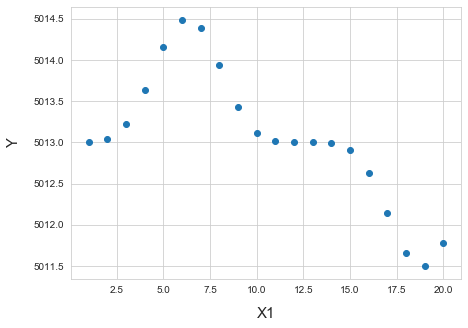

In [30]:
plot_data(data)

#### Polynomial features

In [31]:
def polynomial(data,deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+ str(i+1)] = data_copy['X1'] * data_copy['X' + str(i)]
    return data_copy

##### Polynomial Regression Class

In [32]:
class Polynomial_regression:
    def __init__(self,x,y):
        self.x = x        
        self.y = y
        
    def hypothesis(self,theta):
        return (self.x@theta)
    
    def cost_linear(self,theta):
        err = math.sqrt(mean_squared_error(self.hypothesis(theta),self.y))
        return (err)
    
    def gradient(self,diff,x_attr):
        tot_gradient = np.dot(diff,x_attr)
        return(tot_gradient)
    
    def fit(self,theta):
        parameter_list = []
        loss_list = []
        lr = 0.01
        n_iters = 0
        cost = self.cost_linear(theta)
        for i in range(5000):
            parameter_list.append(theta)
            loss_list.append(cost)
            #diff = hypothesis(x,theta)-y
            theta = theta - lr * (1/self.x.shape[0]) * (self.x.T @ ((self.x @ theta) - self.y))
            
            cost = self.cost_linear(theta)

            #if((old-cost)<0.001):
             #   loss_list.append(cost)
              #  parameter_list.append(theta)
               # return theta,loss_list,parameter_list
        parameter_list.append(theta)
        loss_list.append(cost)
        return theta,loss_list,parameter_list
    
    def predict(self,x,updated_theta):
        return(x@updated_theta)       
    
    def sklearn_regression(self,data,deg):
        polynom = PolynomialFeatures(degree=deg)
        Y = data['Y']
        new_data = data.copy()
        new_data.drop(['Y','X0'],axis=1,inplace=True)
        new_data = pd.DataFrame(polynom.fit_transform(new_data))
        lr = LinearRegression()
        lr.fit(new_data,Y)
        return (lr.predict(new_data),lr)

##### Transforming Polynomial features

In [33]:
deg = 40

In [125]:
poly_data.to_csv("C:/Users/Shivam/Desktop/poly_data.csv")

In [34]:
poly_data = polynomial(data,deg)
#poly_data['X0'] = 1
m = len(poly_data)
poly_data.head()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,5013.001390,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,5013.037992,1,2,4,8,16,32,64,128,256,...,2147483648,4294967296,8589934592,17179869184,34359738368,68719476736,137438953472,274877906944,549755813888,1099511627776
2,5013.220731,1,3,9,27,81,243,729,2187,6561,...,617673396283947,1853020188851841,5559060566555523,16677181699666569,50031545098999707,150094635296999121,450283905890997363,1350851717672992089,4052555153018976267,-6289078614652622815
3,5013.632830,1,4,16,64,256,1024,4096,16384,65536,...,4611686018427387904,0,0,0,0,0,0,0,0,0
4,5014.154482,1,5,25,125,625,3125,15625,78125,390625,...,8033366502585570893,3273344365508751233,-2080022246165795451,8046632842880574361,3339676066983768573,-1748363738790708751,-8741818693953543755,-6815605322348615543,2815461535676025517,-4369436395329424031


In [35]:
poly_data.iloc[:, 2:] = (poly_data.iloc[:, 2:] - np.mean(poly_data.iloc[:, 2:], axis=0)) / np.std(poly_data.iloc[:, 2:], axis=0)

In [36]:
poly_data.head()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,5013.001390,1,-1.647509,-1.143075,-0.902736,-0.766620,-0.677733,-0.614161,-0.565919,-0.527776,...,0.122556,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110565
1,5013.037992,1,-1.474087,-1.119010,-0.899868,-0.766302,-0.677699,-0.614157,-0.565919,-0.527776,...,0.122556,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110566
2,5013.220731,1,-1.300665,-1.078902,-0.892086,-0.764923,-0.677467,-0.614120,-0.565913,-0.527775,...,0.122693,-0.311561,-0.108034,-0.384715,0.204802,0.117859,0.305906,0.153578,0.769603,-1.267898
3,5013.632830,1,-1.127243,-1.022751,-0.876931,-0.761210,-0.676609,-0.613929,-0.565871,-0.527766,...,1.148553,-0.311944,-0.109579,-0.388805,0.188887,0.079842,0.188967,-0.180929,-0.229002,0.110565
4,5014.154482,1,-0.953821,-0.950557,-0.851946,-0.753381,-0.674300,-0.613274,-0.565691,-0.527718,...,1.909801,0.365916,-0.687882,1.584816,1.251250,-0.362997,-2.081299,-1.868657,0.464766,-0.847144


##### Instantiate polynomial regression class

In [37]:
poly_reg = Polynomial_regression(poly_data.drop('Y',axis=1).values.reshape(-1,deg+1),poly_data['Y'])

In [38]:
theta = np.random.randn(deg+1)
theta

array([-0.07347346, -1.57373035,  0.58749917, -1.12127111,  0.64282531,
        1.01458214,  0.51166808,  0.69508527, -0.32361148, -0.03478222,
        1.06448989, -0.35465018,  1.51031809,  0.82357592,  0.92019526,
       -0.85719476,  0.14698217,  0.34333492,  0.74105307, -0.77904767,
        1.11265512,  0.71840901,  0.18391494, -0.52617965, -0.11759674,
       -1.09718212, -0.24920331, -1.8362606 ,  0.47553374,  1.40017967,
        0.30268154,  1.35342013,  0.53400894,  0.68051689, -0.26256764,
        0.14476206, -0.06228534,  1.4505313 ,  0.60003003,  1.20472973,
       -0.22351047])

In [39]:
print("Initial cost : {}".format(poly_reg.cost_linear(theta)))

Initial cost : 5013.128577648392


In [40]:
new_theta,loss_list,parameter_list = poly_reg.fit(theta)

In [41]:
print("Optimal Loss : {}\n\nOptimal Theta : {}".format(loss_list[-1], new_theta))

Optimal Loss : 0.0502072294109148

Optimal Theta : [ 5.01305085e+03 -9.05326760e-01  1.00202990e+00 -9.39619860e-01
  6.40000984e-01  8.61377193e-01  2.31285470e-01  3.05408357e-01
 -8.07444271e-01 -5.99517533e-01  4.30469444e-01 -1.04786641e+00
  7.66577546e-01  3.67002857e-02  9.64421386e-02 -1.70808050e-01
  6.40823731e-01  5.56500117e-01  5.88895676e-01 -3.55355831e-01
  7.19039917e-01 -6.09006417e-01 -2.73770676e-01  1.68353074e-03
 -3.92411891e-03 -1.18711655e+00 -4.86365342e-01 -4.30366356e-01
 -1.66278221e-01  5.72481132e-01  8.45643508e-01  8.95918449e-01
  1.32910235e+00  4.03185574e-01 -2.56861808e-01  2.05058452e-01
  4.62430817e-01  2.85493256e-01  2.56848504e-01  3.91266328e-01
  3.10545173e-02]


In [42]:
pred_optimal = poly_reg.hypothesis(new_theta)

In [43]:
pred_old = poly_reg.hypothesis(theta)

In [44]:
pred_optimal

array([5013.0117151 , 5012.87636514, 5013.24163661, 5013.78297923,
       5014.1425311 , 5014.49089449, 5014.37876005, 5013.92641988,
       5013.42890117, 5013.11809311, 5013.00707676, 5013.00918342,
       5012.99334336, 5012.98830445, 5012.91896125, 5012.60367869,
       5012.14355189, 5011.66373103, 5011.50914771, 5011.7816857 ])

##### Using sklearn polynomial regression

In [45]:
pred_sklearn,lr = poly_reg.sklearn_regression(data,11)

In [46]:
math.sqrt(mean_squared_error(pred_sklearn,data['Y']))

0.021372496806948076

In [47]:
lr.intercept_,lr.coef_

(5012.385535361791,
 array([ 0.00000000e+00,  7.04262415e-01,  3.60566838e-01, -7.79632577e-01,
         4.18731818e-01, -1.09784876e-01,  1.66281297e-02, -1.56010153e-03,
         9.24540403e-05, -3.37841769e-06,  6.96375801e-08, -6.20312960e-10]))

##### creating such 100 samples of same features and predict with optimal theta

In [123]:
n=100
x_new = np.random.rand(n)

In [264]:
data_new = pd.DataFrame(columns=['X0','X1'])
data_new['X0']=[1]*n
data_new['X1']=x_new
poly_data_new = polynomial(data_new,deg)
#poly_data_new['X0']=1
poly_data_new.head()

,X0,X1,X2,X3,X4,X5
0,1,0.039735,0.001579,0.000063,0.000002,9.905452e-08
1,1,0.664861,0.442041,0.293896,0.195400,1.299139e-01
2,1,0.672847,0.452723,0.304613,0.204958,1.379055e-01
3,1,0.468987,0.219949,0.103153,0.048378,2.268848e-02
4,1,0.927493,0.860243,0.797869,0.740018,6.863610e-01


In [265]:
pred_new = (poly_data_new.values.reshape(-1,deg+1))@new_theta

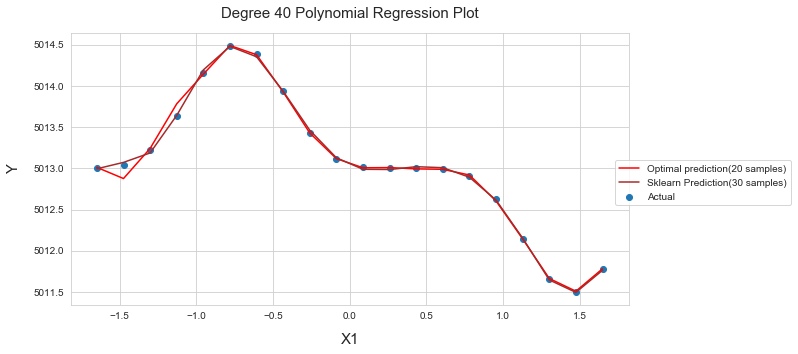

In [48]:
plt.figure(figsize=(10,5))

plt.scatter(poly_data['X1'],poly_data['Y'],label='Actual')
plt.plot(poly_data['X1'],pred_optimal,c='r',label='Optimal prediction(20 samples)')
#plt.scatter(poly_data['X1'],pred_old,c='orange',s=12,label='Inital prediction(20 samples)')
#plt.scatter(poly_data_new['X1'],pred_new,c='violet',s=10,label='Optimal prediction 100 samples')
plt.plot(poly_data['X1'],pred_sklearn,c='Brown',label='Sklearn Prediction(30 samples)')


plt.legend(bbox_to_anchor=(1.3,0.55))
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)
plt.title("Degree {} Polynomial Regression Plot".format(deg),fontsize=15,pad=15)
plt.show()

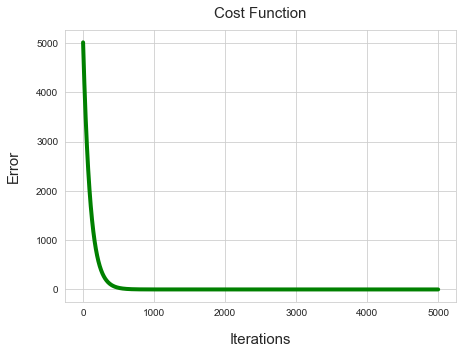

In [49]:
plt.figure(figsize=(7,5))
plt.plot(range(len(loss_list)),loss_list,linewidth=4,c='g')
plt.xlabel('Iterations',fontsize=15,labelpad=15)
plt.ylabel('Error',fontsize=15,labelpad=15)
plt.title("Cost Function",fontsize=15,pad=12)
plt.show()

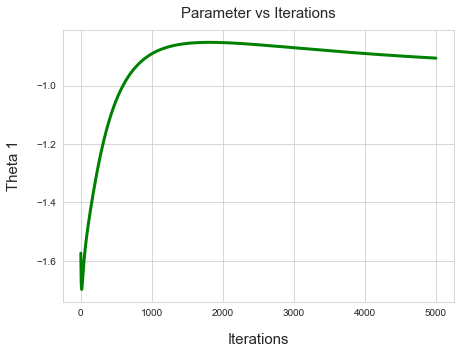

In [50]:
plt.figure(figsize=(7,5))
plt.plot(range(len(parameter_list)),list(zip(*parameter_list))[1],c='g',linewidth=3)
plt.xlabel('Iterations',fontsize=15,labelpad=15)
plt.ylabel('Theta 1',fontsize=15,labelpad=15)
plt.title("Parameter vs Iterations",fontsize=15,pad=12)
plt.show()

In [51]:
print("Change in parameter values as the model complexity increases -->\n\nFrom : {} \n\nTo :{} ".format(theta, parameter_list[-1]))

Change in parameter values as the model complexity increases -->

From : [-0.07347346 -1.57373035  0.58749917 -1.12127111  0.64282531  1.01458214
  0.51166808  0.69508527 -0.32361148 -0.03478222  1.06448989 -0.35465018
  1.51031809  0.82357592  0.92019526 -0.85719476  0.14698217  0.34333492
  0.74105307 -0.77904767  1.11265512  0.71840901  0.18391494 -0.52617965
 -0.11759674 -1.09718212 -0.24920331 -1.8362606   0.47553374  1.40017967
  0.30268154  1.35342013  0.53400894  0.68051689 -0.26256764  0.14476206
 -0.06228534  1.4505313   0.60003003  1.20472973 -0.22351047] 

To :[ 5.01305085e+03 -9.05326760e-01  1.00202990e+00 -9.39619860e-01
  6.40000984e-01  8.61377193e-01  2.31285470e-01  3.05408357e-01
 -8.07444271e-01 -5.99517533e-01  4.30469444e-01 -1.04786641e+00
  7.66577546e-01  3.67002857e-02  9.64421386e-02 -1.70808050e-01
  6.40823731e-01  5.56500117e-01  5.88895676e-01 -3.55355831e-01
  7.19039917e-01 -6.09006417e-01 -2.73770676e-01  1.68353074e-03
 -3.92411891e-03 -1.18711655e+0

#### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

In [53]:
rdg = Ridge(alpha=10)

In [54]:
Y = poly_data['Y']
X = poly_data.copy()
X.drop(['X0','Y'],axis=1,inplace=True)
rdg.fit(X,Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [55]:
rdg.intercept_,rdg.coef_

(5013.050848006293,
 array([-0.01520239, -0.05987037, -0.07046842, -0.06833754, -0.06219796,
        -0.05514756, -0.04823907, -0.04180713, -0.03593472, -0.03061668,
        -0.02581771, -0.02149337, -0.01759795, -0.01408752, -0.04333614,
         0.04234799, -0.01387527, -0.0531598 , -0.00828589, -0.03364073,
        -0.11138269,  0.00728813, -0.00683974,  0.06152843, -0.05972512,
         0.05557531,  0.10462497,  0.01319804,  0.1245635 ,  0.10210475,
         0.01937071,  0.03754137,  0.05958238, -0.017529  , -0.04828202,
        -0.00136025, -0.0237107 , -0.04460325, -0.03238099, -0.03918966]))

In [56]:
pred_ridge = rdg.predict(X)

In [57]:
lr.coef_,lr.intercept_

(array([ 0.00000000e+00,  7.04262415e-01,  3.60566838e-01, -7.79632577e-01,
         4.18731818e-01, -1.09784876e-01,  1.66281297e-02, -1.56010153e-03,
         9.24540403e-05, -3.37841769e-06,  6.96375801e-08, -6.20312960e-10]),
 5012.385535361791)

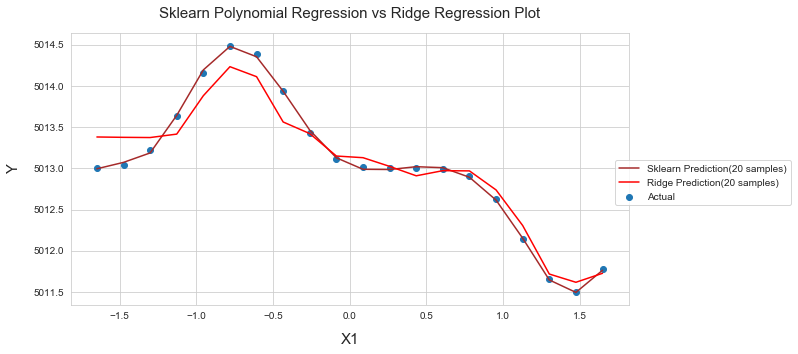

In [58]:
plt.figure(figsize=(10,5))

plt.scatter(poly_data['X1'],poly_data['Y'],label='Actual')
#plt.plot(poly_data['X1'],pred_optimal,c='r',label='Optimal prediction(20 samples)')
#plt.scatter(poly_data['X1'],pred_old,c='orange',s=12,label='Inital prediction(20 samples)')
#plt.scatter(poly_data_new['X1'],pred_new,c='violet',s=10,label='Optimal prediction 100 samples')
plt.plot(poly_data['X1'],pred_sklearn,c='Brown',label='Sklearn Prediction(20 samples)')
plt.plot(poly_data['X1'],pred_ridge,c='Red',label='Ridge Prediction(20 samples)')


plt.legend(bbox_to_anchor=(1.3,0.55))
plt.xlabel("X1",fontsize=15,labelpad=12)
plt.ylabel("Y",fontsize=15,labelpad=12)
plt.title("Sklearn Polynomial Regression vs Ridge Regression Plot".format(deg),fontsize=15,pad=15)
plt.show()